# Stock Prediction Test 02

### Fontes:
https://medium.com/neuronio-br/prevendo-valores-de-a%C3%A7%C3%B5es-com-lstm-b7b3a737aa4

### Stocks:
Peguei os dados das ações do Yahoo (Historical Data > Time Period > Apply > Download):

https://finance.yahoo.com

### Links úteis
https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html

In [9]:
# Importando as dependências
from keras.models import Sequential
from keras.layers import LSTM,Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
# Configurações globais
plt.style.use('bmh')
initial_year = 2010

In [59]:
# Carregando os dados da companhia A
url_A = 'https://raw.githubusercontent.com/ThiagoGarciaAlves/stock-prediction-tests/master/stocks/GOOG.csv'
df_A = pd.read_csv(url_A)
df_A['Date'] = pd.to_datetime(df_A['Date'])
df_A = df_A[(df_A['Date'].dt.year >= initial_year)] # Deixando somente os dados de 2010 em diante
df_A.set_index('Date', inplace=True)
df_A = df_A['Close'] # Deixando somente a coluna 'Close"
df_A

Date
2010-01-04     312.204773
2010-01-05     310.829926
2010-01-06     302.994293
2010-01-07     295.940735
2010-01-08     299.885956
                 ...     
2020-06-08    1446.609985
2020-06-09    1456.160034
2020-06-10    1465.849976
2020-06-11    1403.839966
2020-06-12    1413.180054
Name: Close, Length: 2629, dtype: float64

In [60]:
# Carregando os dados da companhia B
url_B = 'https://raw.githubusercontent.com/ThiagoGarciaAlves/stock-prediction-tests/master/stocks/MSFT.csv'
df_B = pd.read_csv(url_B)
df_B['Date'] = pd.to_datetime(df_B['Date'])
df_B = df_B[(df_B['Date'].dt.year >= initial_year)]
df_B.set_index('Date', inplace=True)
df_B = df_B['Close']
df_B

Date
2010-01-04     30.950001
2010-01-05     30.959999
2010-01-06     30.770000
2010-01-07     30.450001
2010-01-08     30.660000
                 ...    
2020-06-08    188.360001
2020-06-09    189.800003
2020-06-10    196.839996
2020-06-11    186.270004
2020-06-12    187.740005
Name: Close, Length: 2629, dtype: float64

In [61]:
# Carregando os dados da companhia C
url_C = 'https://raw.githubusercontent.com/ThiagoGarciaAlves/stock-prediction-tests/master/stocks/AMZN.csv'
df_C = pd.read_csv(url_C)
df_C['Date'] = pd.to_datetime(df_C['Date'])
df_C = df_C[(df_C['Date'].dt.year >= initial_year)]
df_C.set_index('Date', inplace=True)
df_C = df_C['Close']
df_C

Date
2010-01-04     133.899994
2010-01-05     134.690002
2010-01-06     132.250000
2010-01-07     130.000000
2010-01-08     133.520004
                 ...     
2020-06-08    2524.060059
2020-06-09    2600.860107
2020-06-10    2647.449951
2020-06-11    2557.959961
2020-06-12    2545.020020
Name: Close, Length: 2629, dtype: float64

In [62]:
# Carregando os dados da companhia D
url_D = 'https://raw.githubusercontent.com/ThiagoGarciaAlves/stock-prediction-tests/master/stocks/AAPL.csv'
df_D = pd.read_csv(url_D)
df_D['Date'] = pd.to_datetime(df_D['Date'])
df_D = df_D[(df_D['Date'].dt.year >= initial_year)]
df_D.set_index('Date', inplace=True)
df_D = df_D['Close']
df_D

Date
2010-01-04     30.572857
2010-01-05     30.625713
2010-01-06     30.138571
2010-01-07     30.082857
2010-01-08     30.282858
                 ...    
2020-06-08    333.459991
2020-06-09    343.989990
2020-06-10    352.839996
2020-06-11    335.899994
2020-06-12    338.799988
Name: Close, Length: 2629, dtype: float64

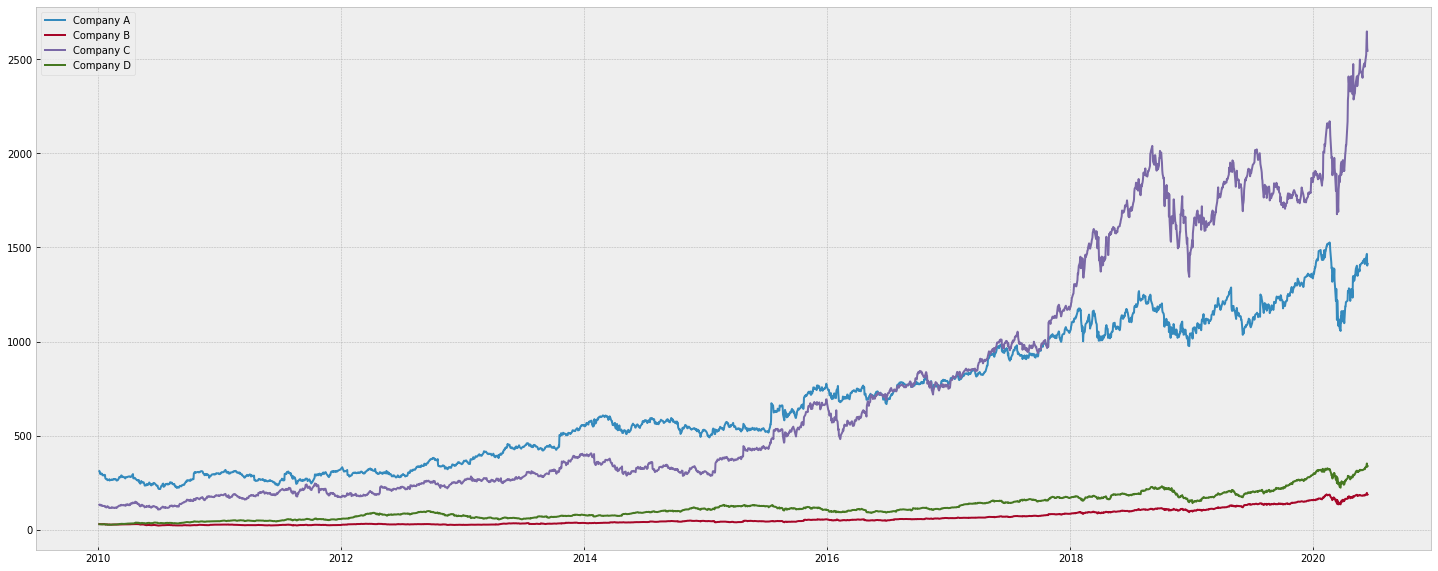

In [63]:
# Visualizando os dados
plt.figure(figsize = (25,10))
# plt.plot(df_A['Date'], df_A['Close'], label='Company A')
# plt.plot(df_B['Date'], df_B['Close'], label='Company B')
# plt.plot(df_C['Date'], df_C['Close'], label='Company C')
# plt.plot(df_D['Date'], df_D['Close'], label='Company D')
plt.plot(df_A, label='Company A')
plt.plot(df_B, label='Company B')
plt.plot(df_C, label='Company C')
plt.plot(df_D, label='Company D')
plt.legend(loc='best')
plt.show()

In [0]:
# Médias móveis
# limit = 50
# df_A['MM_10'] = df_A['Close'].rolling(10).mean().shift()
# df_A['MM_20'] = df_A['Close'].rolling(20).mean().shift()
# plt.figure(figsize = (25,10))
# plt.grid(True)
# # plt.plot(df_A['Date'], df_A['Close'], label='Company A')
# # plt.plot(df_A['Date'], df_A['MM_10'], label='MM_10')
# # plt.plot(df_A['Date'], df_A['MM_20'], label='MM 20')
# plt.plot(df_A['Close'][-limit:], label='Company A')
# plt.plot(df_A['MM_10'][-limit:], label='MM_10')
# plt.plot(df_A['MM_20'][-limit:], label='MM 20')
# plt.legend(loc='best')
# plt.show()

In [0]:
look_back = 40 # dias passados a analisar
forward_days = 10 # dias a prever
num_periods = 20


In [65]:
# Normalizando os dados
array = df_A.values.reshape(df_A.shape[0],1)
array[:5]

array([[312.204773],
       [310.829926],
       [302.994293],
       [295.940735],
       [299.885956]])

In [66]:
# https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()
array = scl.fit_transform(array)
array[:5]

array([[0.07253624],
       [0.07148631],
       [0.06550249],
       [0.06011591],
       [0.06312875]])

In [67]:
# Dividindo os dados
print(num_periods)
print(forward_days)
print(num_periods*forward_days)
print(len(array))
division = len(array) - num_periods*forward_days
division

20
10
200
2629


2429

In [68]:
array_test = array[division-look_back:]
array_train = array[:division]
print(len(array))
print(len(array_test))
print(len(array_train))
# print(array_test)
# print(array_train)

2629
240
2429


In [0]:
#Get the data and splits in input X and output Y, by spliting in `n` past days as input X 
#and `m` coming days as Y.
def processData(data, look_back, forward_days,jump=1):
    X,Y = [],[]
    for i in range(0,len(data) -look_back -forward_days +1, jump):
        X.append(data[i:(i+look_back)])
        Y.append(data[(i+look_back):(i+look_back+forward_days)])
    return np.array(X),np.array(Y)

In [0]:
X_test, y_test = processData(array_test,look_back,forward_days,forward_days)
y_test = np.array([list(a.ravel()) for a in y_test])

X,y = processData(array_train,look_back,forward_days)
y = np.array([list(a.ravel()) for a in y])

# print(X_test)
# print(y_test)
# print(X)
# print(y)

from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.20, random_state=42)

In [72]:
print(X_train.shape)
print(X_validate.shape)
print(X_test.shape)
print(y_train.shape)
print(y_validate.shape)
print(y_test.shape)

(1904, 40, 1)
(476, 40, 1)
(20, 40, 1)
(1904, 10)
(476, 10)
(20, 10)


In [73]:
# Construindo e treinando o modelo LSTM
# #Optionaly, you can load a model
# model = load_model('LSTM_compA_LB40_FD10_E50_F50_S30.h5')

NUM_NEURONS_FirstLayer = 50
NUM_NEURONS_SecondLayer = 30
EPOCHS = 10

#Build the model
model = Sequential()
model.add(LSTM(NUM_NEURONS_FirstLayer,input_shape=(look_back,1), return_sequences=True))
model.add(LSTM(NUM_NEURONS_SecondLayer,input_shape=(NUM_NEURONS_FirstLayer,1)))
model.add(Dense(forward_days))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train,y_train,epochs=EPOCHS,validation_data=(X_validate,y_validate),shuffle=True,batch_size=2, verbose=2)

Train on 1904 samples, validate on 476 samples
Epoch 1/10
 - 30s - loss: 0.0026 - val_loss: 5.4356e-04
Epoch 2/10
 - 30s - loss: 8.2465e-04 - val_loss: 0.0014
Epoch 3/10
 - 29s - loss: 7.1204e-04 - val_loss: 4.4947e-04
Epoch 4/10
 - 29s - loss: 5.8686e-04 - val_loss: 5.7594e-04
Epoch 5/10
 - 29s - loss: 5.9119e-04 - val_loss: 4.8917e-04
Epoch 6/10
 - 29s - loss: 5.4362e-04 - val_loss: 6.3225e-04
Epoch 7/10
 - 29s - loss: 5.4978e-04 - val_loss: 4.2805e-04
Epoch 8/10
 - 29s - loss: 5.0294e-04 - val_loss: 4.3231e-04
Epoch 9/10
 - 29s - loss: 4.5552e-04 - val_loss: 4.5792e-04
Epoch 10/10
 - 29s - loss: 4.7395e-04 - val_loss: 6.3675e-04


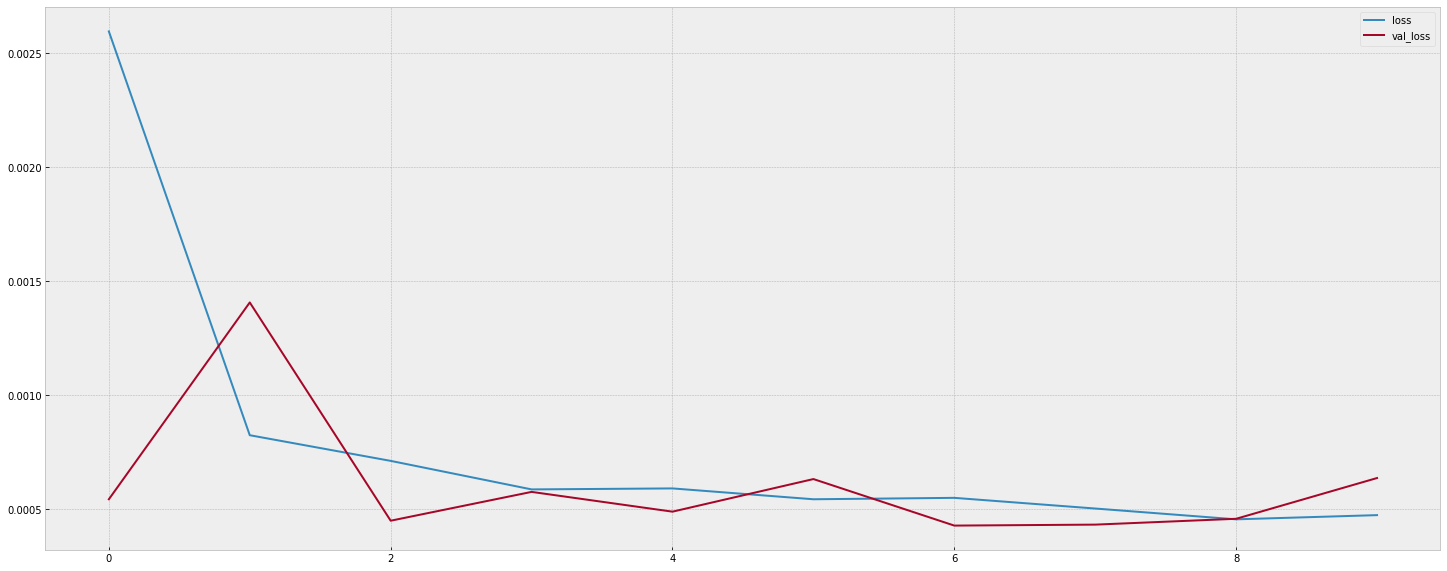

In [74]:
plt.figure(figsize = (25,10))

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='best')
plt.show()

In [76]:
#Saving the model
file_name = 'LSTM_compA_LB{}_FD{}_E{}_F{}_S{}.h5'.format(look_back, forward_days, EPOCHS, NUM_NEURONS_FirstLayer, NUM_NEURONS_SecondLayer)
model.save(file_name)
print("Saved model `{}` to disk".format(file_name))

Saved model `LSTM_compA_LB40_FD10_E10_F50_S30.h5` to disk


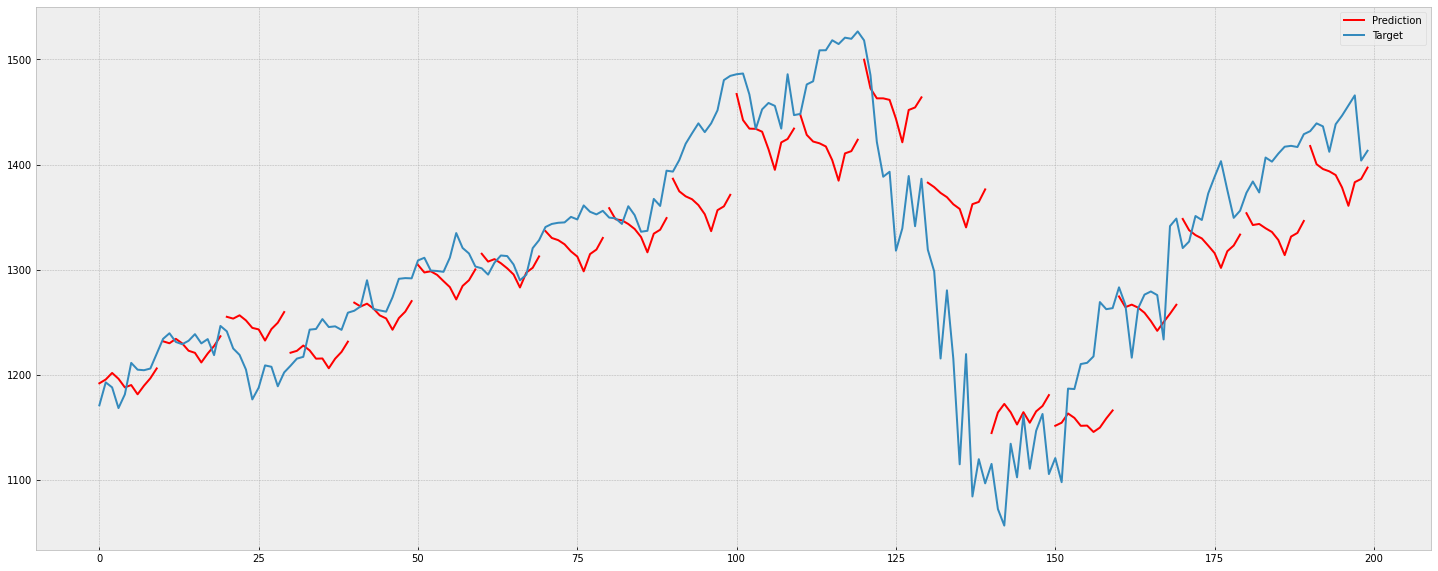

In [77]:
# Prevendo os testes para ver o resultado
Xt = model.predict(X_test)

plt.figure(figsize = (25,10))

for i in range(0, len(Xt)):
    plt.plot([x + i*forward_days for x in range(len(Xt[i]))], scl.inverse_transform(Xt[i].reshape(-1,1)), color='r')
    
plt.plot(0, scl.inverse_transform(Xt[i].reshape(-1,1))[0], color='r', label='Prediction') #only to place the label
    
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)), label='Target')
plt.legend(loc='best')
plt.show()

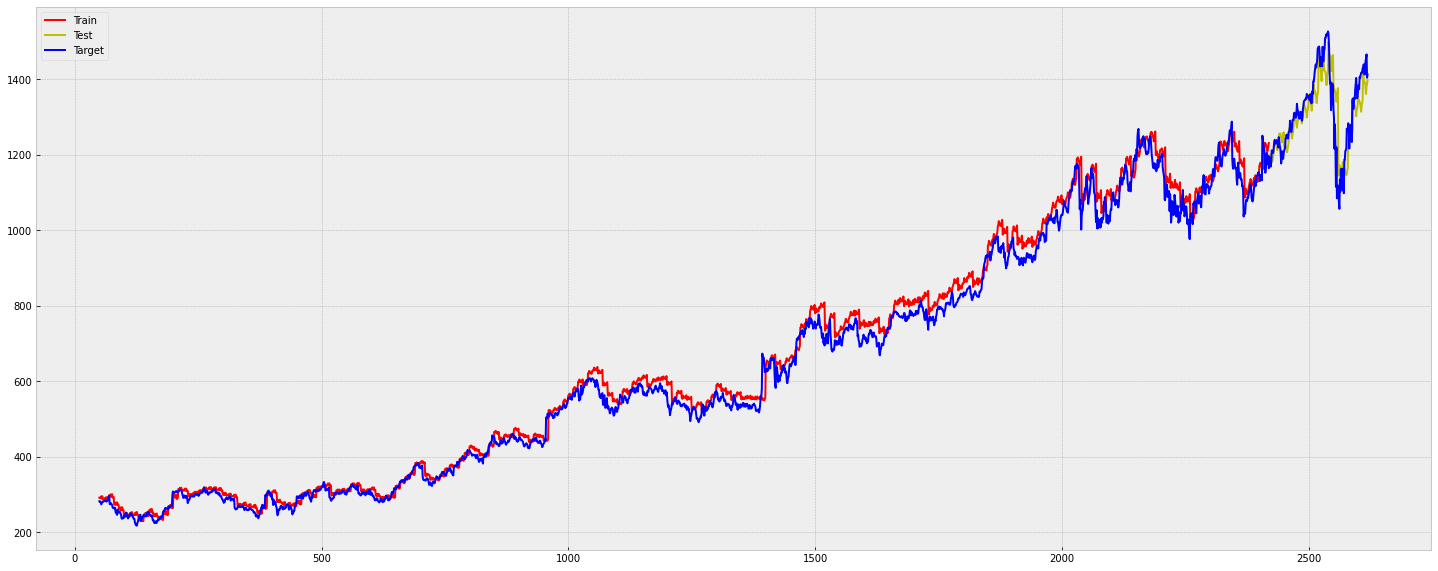

In [78]:
# Prevendo todos os dados
division = len(array) - num_periods*forward_days

leftover = division%forward_days+1

array_test = array[division-look_back:]
array_train = array[leftover:division]

Xtrain,ytrain = processData(array_train,look_back,forward_days,forward_days)
Xtest,ytest = processData(array_test,look_back,forward_days,forward_days)

Xtrain = model.predict(Xtrain)
Xtrain = Xtrain.ravel()

Xtest = model.predict(Xtest)
Xtest = Xtest.ravel()

y = np.concatenate((ytrain, ytest), axis=0)

plt.figure(figsize = (25,10))

# Data in Train/Validation
plt.plot([x for x in range(look_back+leftover, len(Xtrain)+look_back+leftover)], scl.inverse_transform(Xtrain.reshape(-1,1)), color='r', label='Train')
# Data in Test
plt.plot([x for x in range(look_back +leftover+ len(Xtrain), len(Xtrain)+len(Xtest)+look_back+leftover)], scl.inverse_transform(Xtest.reshape(-1,1)), color='y', label='Test')

#Data used
plt.plot([x for x in range(look_back+leftover, look_back+leftover+len(Xtrain)+len(Xtest))], scl.inverse_transform(y.reshape(-1,1)), color='b', label='Target')

#Initial data. It should overlap the data used
#plt.plot(scl.inverse_transform(array), color='b', label='Esperado')

plt.legend(loc='best')
plt.show()